In this notebook a script is made to create new noise images to add to our dataset in order to attempt to improve our model.

### imports

In [2]:
import os, sklearn, numpy as np
from sklearn import svm
from skimage import data, io, filters
import matplotlib.pyplot as plt
import string
from random import *
import matplotlib
import pandas
import csv
%matplotlib inline

In [3]:
# custom scripts
import config # params, constants
import data # functions that mutate outr data

 Dataset :: namedtuple(
    ['train' = ['img_name']
    , 'test' = ['img_name']
    , 'labels' = pandas.df('img_name','breed')
    , 'dict_index_to_label' = dict to convert label_index -> label_name
    , 'dict_label_to_index'= dict to convert label_name -> label_index
    


In [6]:
# labels = pandas.read_csv('../datasets/labels.csv')
# dataset = data.Dataset(config.dataset_dir, label_name='breed')

# train_list is just a list of image names, not te actual data
dataset = data.init_dataset()
train_list, test_list, labels = dataset.train, dataset.test, dataset.labels
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,71a6f4d727536d9188fde88dd63fc516,scottish_deerhound
freq,1,126


Function to generate random image

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


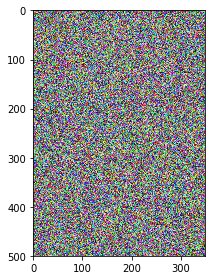

In [7]:
# generate a random image
def random_img(shape=[373,500,3]):
    # TODO use the same datatype as training-data
    return np.random.random(shape)
io.imshow(random_img([500,350,3]))

First we have to create a function that will create a unique ID for the new images

In [5]:
allchar = string.ascii_letters + string.punctuation + string.digits
def create_rand_str(amt_of_chars):
    allchar = string.ascii_letters + string.digits
    unique_id = "".join(choice(allchar.lower()) for x in range(amt_of_chars))
    return unique_id

create_rand_str(36)


'jr08eo75gprzy3ny4x05iennou64xrvkg3v8'

Then we create a function to create the new images. Some_dir and amt_imgs needs to be filled in by hand

In [6]:
def add_random_images_to_dir(some_dir, amt_train_imgs, amt_test_imgs):
    # create random training images
    for _ in range(amt_train_imgs):
        # create image id
        img_id = create_rand_str(36)
        # create new image
        noise_img = random_img([500,350,3])
        label_to_csv('0', img_id)
        # save the image to directory
        matplotlib.image.imsave("{0}/{1}.png".format(some_dir, img_id), noise_img)
    
    # create random testing images
    for _ in range(amt_test_imgs):
        # create image id
        img_id = create_rand_str(36)
        # create new image
        noise_img = random_img([500,350,3])
        label_to_csv('0', img_id)
        # save the image to directory
        matplotlib.image.imsave("{0}/{1}.png".format(some_dir, img_id), noise_img)


def label_to_csv(label, unique_id):
    # adds the label and the unique id to the label csv file
    fd = open('src/data/labels.csv','a') # WHEN TESTING, FILL IN A COPY OF THE FILE
    row = '{0},{1}'.format(unique_id, label)
    fd.write(row)
    fd.close()

# (dir, amount training images, amount test images)
add_random_images_to_dir('fill in', 1,1)   # FILL IN DIRECTORY   
        


FileNotFoundError: [Errno 2] No such file or directory: 'src/data/labels.csv'